# Hill Valley High School
## Student Performance Prediction
This tool provides reasonably accurate predictions of a student's next test performance and can determine if additional support, such as tutoring, is needed. It uses multiple linear regression to predict student performance. See below for more information on how it works. This tool can be used by teachers or students to simulate outcomes and help guide decisions.

In [101]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score # I think I could do without this one if I rename the thing metrics.r2_score

import ipywidgets as widgets
from IPython.display import Markdown as md

import warnings


In [18]:
# Import the data
df = pd.read_csv('StudentPerformanceData.csv')

In [20]:
# Split independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [103]:
# Suppress all warnings - so the 'LinearRegression' icon is not displayed
warnings.filterwarnings('ignore')

# Train the model using Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Re-enable warnings
warnings.filterwarnings('default')

## Instructions
Input values below for previous test Score (0-100), number of hours studied (0-9), the number of practice tests taken (0-9), and the number of hours the student is expected to get the night before the exam (0-9), then click the "Predict" button to see the results.

In [54]:
# Test the model
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=0)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [56]:
# This cell contains the UI - all the widgets and output for the interactive part of the app
# Output the widgets will be displayed on
out1 = widgets.Output()

# Text box to input previous score (0-100)
tbox_prev_score = widgets.BoundedIntText(
    value=75,
    min=0,
    max=100,
    step=1,
    description='Previous Score:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='175px')
)

# Slider to input study hours (0-9)
slide_study_hrs = widgets.IntSlider(
    value=7,
    min=0,
    max=9,
    step=1,
    description='Study Hours :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style={'description_width': 'initial'},
    readout_format='d'
)

# Slider to input the number of practice tests taken (0-9)
slide_practice_tests = widgets.IntSlider(
    value=7,
    min=0,
    max=9,
    step=1,
    description='Practice Tests:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style={'description_width': 'initial'},
    readout_format='d'
)

# Slider to input the number of hours of sleep (0-9)
slide_sleep_hrs = widgets.IntSlider(
    value=7,
    min=0,
    max=9,
    step=1,
    description='Sleep Hours :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    style={'description_width': 'initial'},
    readout_format='d'
)

# "Predict" button
btn_pred = widgets.Button(description="Predict")

# Method that will be performed when the "Predict" button is clicked
def btn_pred_clicked(b):
    # Clear the Output on each click
    out1.clear_output()
    
    # Collect widget values into variables for easier processing
    prev_score = tbox_prev_score.value
    study_hrs = slide_study_hrs.value
    practice_tests = slide_practice_tests.value
    sleep_hrs = slide_sleep_hrs.value

    # Collect variables into a 2D array for easier processing
    pred_vals = [[study_hrs, prev_score, sleep_hrs, practice_tests]]

    # Call predict function on the values from the widgets
    pred_score = regressor.predict(pred_vals)

    # Convert the prediction score into a simple integer for easier output and allow a max value of 100
    temp = pred_score[[0]]
    i_pred = int(temp)
    if i_pred > 100:
        i_pred = 100
        
    # Set output string based on predicted score - a score below 75 will classify the student as 'at risk'
    str_risk = 'NOT at risk and should not need additional support'
    if i_pred < 75:
        str_risk = 'AT RISK and may require additional support'   

    # Display output message along with output string from above
    with out1:
        display(md("### Predicted Score: {} - The student is {}.".format(i_pred, str_risk)))
    
# When the "Predict" button is clicked it will call the funciton in the parentheses
btn_pred.on_click(btn_pred_clicked)

# Create a vertical box (VBOx) to nicely display widgets and output
vbox = widgets.VBox([tbox_prev_score,
                     slide_study_hrs,
                     slide_practice_tests,
                     slide_sleep_hrs,
                     btn_pred,
                     out1]) 
# Display everything
display(vbox)

## How it works
This app predicts student performance by analyzing data from past student results. A machine learning model is trained on this data, using multiple linear regression to make predictions. Multiple linear regression assesses how a combination of factors impacts performance outcomes. In this case, factors such as previous scores, hours studied, hours slept, and number of practice tests are used to predict the next test score. The graphs below illustrate each factor plotted against the new score (in blue) along with the regression line (in red).

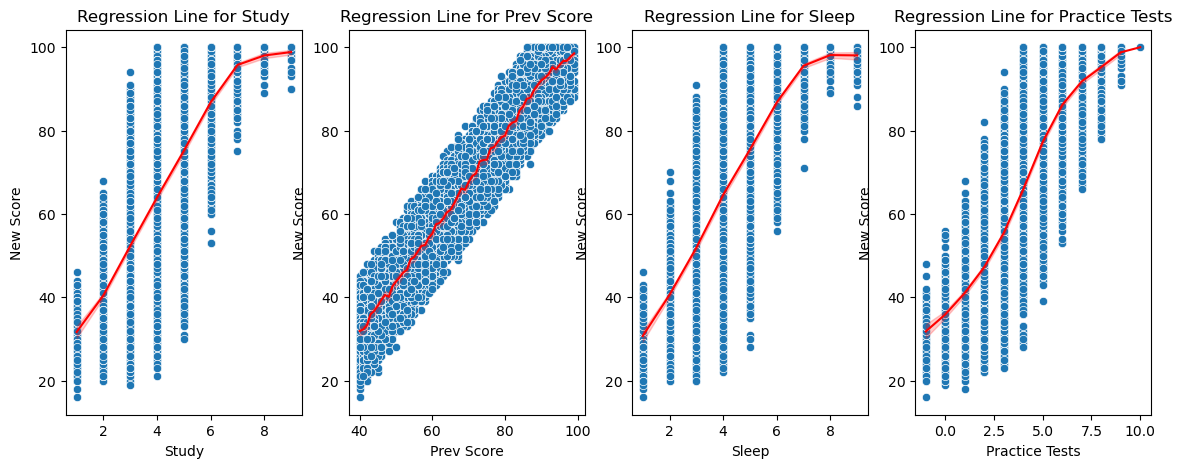

In [31]:
# Create a scatter plots with regression line for each feature
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

for i, col in enumerate(['Study', 'Prev Score', 'Sleep', 'Practice Tests']):
    sns.scatterplot(x=col, y='New Score', data=df, ax=axes[i])
    sns.lineplot(x=col, y='New Score', data=df, ax=axes[i], color='red')
    axes[i].set_title(f'Regression Line for {col}')

plt.show()

## Feature Correlation
Each feature used to predict the target variable (new score) correlates with the target variable and with other features. A correlation matrix shows the correlation between each pair of variables (see below). The closer the value is to 1 (dark blue), the stronger the positive correlation. The closer the value is to 0 (white), the weaker the correlation.

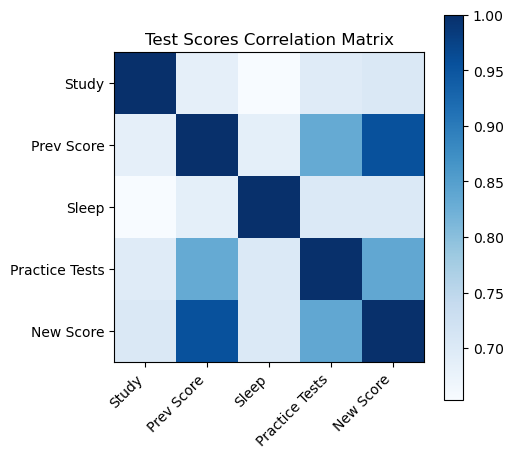

In [33]:
# Create a correlation matrix for all features and target
matrix = df.corr()
plt.figure(figsize=(5,5))
plt.imshow(matrix, cmap="Blues")
plt.colorbar()
variables = []
for i in matrix.columns:
    variables.append(i)

plt.title('Test Scores Correlation Matrix')
plt.xticks(range(len(matrix)), variables, rotation = 45, ha='right')
plt.yticks(range(len(matrix)), variables)

plt.show()

## Exploring Feature Relationships Further
A scatter matrix, also known as a pair plot, is a grid of scatter plots that illustrates the relationships between pairs of variables. Along the diagonal, where each variable intersects with itself, a histogram displays the variable's distribution. Below is a scatter matrix for this dataset.

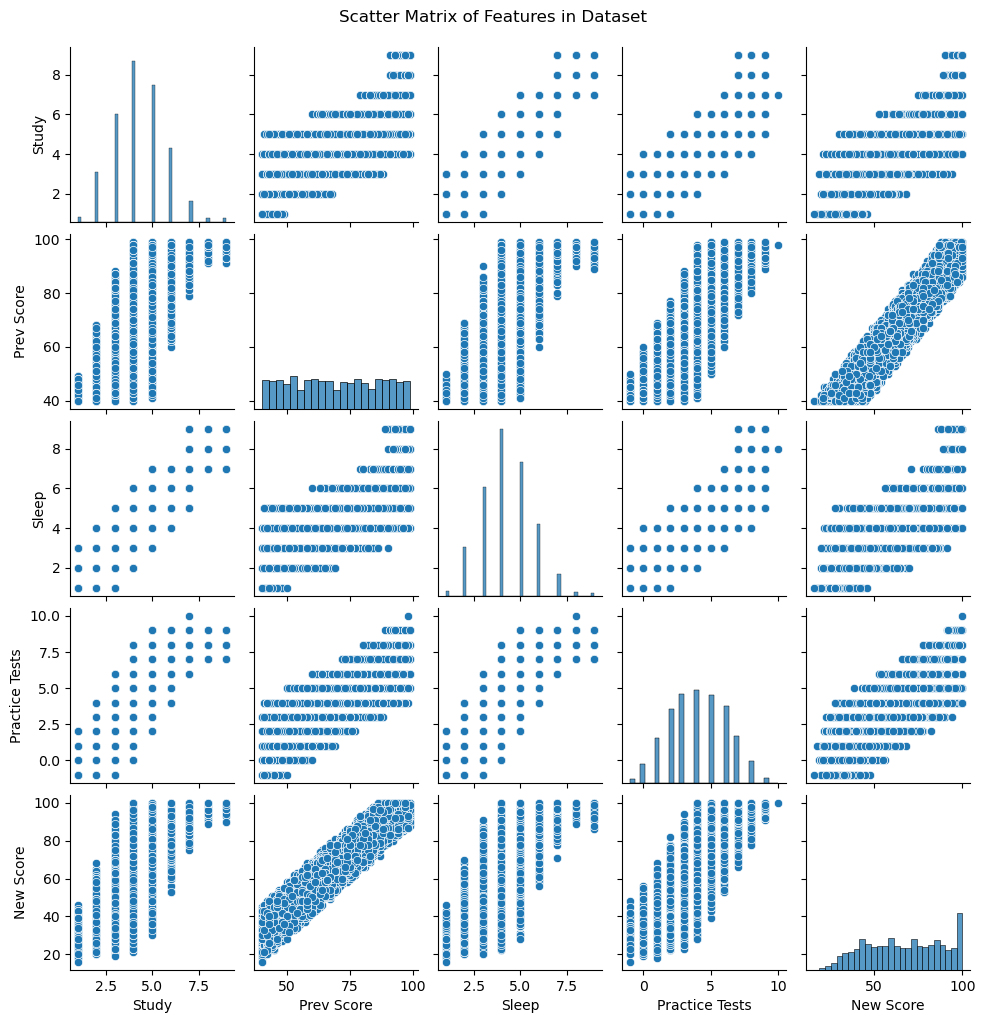

In [35]:
# Create a scatter matrix for all features and target
sns.pairplot(df, height=2, aspect=1)
plt.suptitle('Scatter Matrix of Features in Dataset', y=1.02)  # y= to adjust the title vertical position
plt.show()

## Measures of Accuracy

In [49]:
# Calculate Metrics - r score, mean absolute error, mean squared error, and root mean squared error
r_score = round(metrics.r2_score(y_test, y_pred), 2)
mae = round(metrics.mean_absolute_error(y_test, y_pred), 2)
mse = round(metrics.mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

There are various ways to measure the accuracy of regression models. Some of the most common are:
* R-Squared - Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It is commonly used to assess the model's goodness of fit. Values range from 0 to 1 with values closer to 1 indicating a better fit.
* Mean Absolute Error (MAE) - The average of the absolute difference between the actual and predicted values. Has the same units as the target variable.
* Mean Squared Error (MSE) - The average of the squared difference between the actual and predicted values. It is sensitive to outliers.
* Root Mean Squared Error (RMSE) - The square root of the MSE. Puts the MSE into the units of the target variable. It is sensitive to outliers.

The model used for this application was tested with a different dataset than it was trained to. 
### Testing of the model yielded the following values:

In [91]:
md("* ### R-Squared: {}".format(r_score))

* ### R-Squared: 0.92

In [88]:
md("* ### Mean Absolute Error (MAE): {}".format(mae))

* ### Mean Absolute Error (MAE): 5.05

In [82]:
md("* ### Mean Squared Error (MSE): {}".format(mse))

* ### Mean Squared Error (MSE): 34.29

In [84]:
md("* ### Root Mean Squared Error (RMSE): {}".format(rmse))

* ### Root Mean Squared Error (RMSE): 5.86

# 
